In [ ]:
import pandas as pd
import numpy as np
path = '/content/sample_data/adult.data'
df_train = pd.read_csv(path, header = None)
df_train

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [ ]:
path_test = '/content/sample_data/adult.test'
df_test = pd.read_csv(path_test, delimiter=',', header=None, skiprows=1)
df_test[14] = df_test[14].str.replace('.', '')
df_test

<ipython-input-256-99b0f61172ad>:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df_test[14] = df_test[14].str.replace('.', '')


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16276,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K
16277,64,?,321403,HS-grad,9,Widowed,?,Other-relative,Black,Male,0,0,40,United-States,<=50K
16278,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
16279,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K


#Data Cleaning

In [ ]:
df_train.isna()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
32557,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
32558,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
32559,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False



Here we can see that there are no missing rows

In [ ]:
df_train.columns = ["age","workclass","fnlwgt","education", "education.num","marital.status","occupation","relationship","race","sex","capital.gain","capital.loss","hours.per.week","native.country","income"]

In [ ]:
missing_values_count = df_train.isnull().sum()
missing_values_count[0:15]

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

In [ ]:
question_mark_count = (df_train == ' ?').sum()
print(question_mark_count)

age                  0
workclass         1836
fnlwgt               0
education            0
education.num        0
marital.status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital.gain         0
capital.loss         0
hours.per.week       0
native.country     583
income               0
dtype: int64


In [ ]:
df_train = df_train.replace(' ?', np.nan)

In [ ]:
df_train_dropped = df_train.dropna()
df_train_dropped

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [ ]:
#Finding what percentage of data is missing from the dataset

total = df_train.isnull().sum().sort_values(ascending=False)
percent_1 = df_train.isnull().sum()/df_train.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])
missing_data.head(15)

,Total,%
occupation,1843,5.7
workclass,1836,5.6
native.country,583,1.8
age,0,0.0
fnlwgt,0,0.0
education,0,0.0
education.num,0,0.0
marital.status,0,0.0
relationship,0,0.0
race,0,0.0


In [ ]:
df_train['occupation'].describe()

count               30718
unique                 14
top        Prof-specialty
freq                 4140
Name: occupation, dtype: object

In [ ]:
#Since mode is Prof-specialty, replacing null values with it

df_train['occupation'] = df_train['occupation'].fillna('Prof-specialty')

In [ ]:
df_train['workclass'].describe()


count        30725
unique           8
top        Private
freq         22696
Name: workclass, dtype: object

In [ ]:
df_train['workclass'] = df_train['workclass'].fillna('Private')


In [ ]:
df_train['native.country'].describe()

count              31978
unique                41
top        United-States
freq               29170
Name: native.country, dtype: object

In [ ]:
df_train['native.country'] = df_train['native.country'].fillna('United-States')


In [ ]:
df_train.describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


##Cleaning the test data

In [ ]:
df_test.columns = ["age","workclass","fnlwgt","education", "education.num","marital.status","occupation","relationship","race","sex","capital.gain","capital.loss","hours.per.week","native.country","income"]

In [ ]:
question_mark_count_test = (df_test == ' ?').sum()
print(question_mark_count_test)

age                 0
workclass         963
fnlwgt              0
education           0
education.num       0
marital.status      0
occupation        966
relationship        0
race                0
sex                 0
capital.gain        0
capital.loss        0
hours.per.week      0
native.country    274
income              0
dtype: int64


In [ ]:
df_test = df_test.replace(' ?', np.nan)
nan_count = df_test.isnull().sum().sum()
nan_count


2203

In [ ]:
df_test['occupation'].describe()

count               15315
unique                 14
top        Prof-specialty
freq                 2032
Name: occupation, dtype: object

In [ ]:
df_test['occupation'] = df_test['occupation'].fillna('Prof-specialty')

In [ ]:
df_test['workclass'].describe()

count        15318
unique           8
top        Private
freq         11210
Name: workclass, dtype: object

In [ ]:
df_test['workclass'] = df_test['workclass'].fillna('Private')


In [ ]:
df_test['native.country'].describe()

count              16007
unique                40
top        United-States
freq               14662
Name: native.country, dtype: object

In [ ]:
df_test['native.country'] = df_test['native.country'].fillna('United-States')

#Model Training

In [ ]:

X_train= df_train.drop(['income'], axis=1)
Y_train = df_train['income']

X_test= df_test.drop(['income'], axis=1)
Y_test = df_test['income']

In [ ]:
from sklearn import preprocessing

categorical = ['workclass','education', 'marital.status', 'occupation', 'relationship','race', 'sex','native.country']
for feature in categorical:
        le = preprocessing.LabelEncoder()
        X_train[feature] = le.fit_transform(X_train[feature])
        X_test[feature] = le.transform(X_test[feature])

In [ ]:

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = pd.DataFrame(scaler.fit_transform(X_train), columns = X_train.columns)

X_test = pd.DataFrame(scaler.transform(X_test), columns = X_train.columns)
X_train.head()


,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country
0,0.030671,1.658412,-1.063611,-0.335437,1.134739,0.921634,-1.483582,-0.277805,0.393668,0.703071,0.148453,-0.21666,-0.035429,0.251378
1,0.837109,1.026306,-1.008707,-0.335437,1.134739,-0.406212,-0.790510,-0.900181,0.393668,0.703071,-0.145920,-0.21666,-2.222153,0.251378
2,-0.042642,-0.237906,0.245079,0.181332,-0.420060,-1.734058,-0.328461,-0.277805,0.393668,0.703071,-0.145920,-0.21666,-0.035429,0.251378
3,1.057047,-0.237906,0.425801,-2.402511,-1.197459,-0.406212,-0.328461,-0.900181,-1.962621,0.703071,-0.145920,-0.21666,-0.035429,0.251378
4,-0.775768,-0.237906,1.408176,-0.335437,1.134739,-0.406212,0.595635,2.211698,-1.962621,-1.422331,-0.145920,-0.21666,-0.035429,-5.337971


#KNN

In [ ]:

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)
acc_knn = knn.score(X_train, Y_train) * 100


print("training accuracy:", acc_knn)
error_rate_knn = 100.0 - acc_knn


print("training error:", error_rate_knn)

test_accuracy = knn.score(X_test, Y_test)
print("testing accuracy:", test_accuracy*100)

print("testing error:", 100.0 - test_accuracy*100)

training accuracy: 89.75154325727097
training error: 10.248456742729033
testing accuracy: 82.18168417173392
testing error: 17.81831582826608


#Gaussian NB


In [ ]:
from sklearn.naive_bayes import GaussianNB
gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)
Y_pred = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_train, Y_train) * 100, 2)

print("training accuracy:", acc_gaussian)
error_rate_gaussian= 100-acc_gaussian


print("training error:", error_rate_gaussian)

test_accuracy = gaussian.score(X_test, Y_test)
print("testing accuracy:", test_accuracy*100)

print("testing error:", 100.0 - test_accuracy*100)

training accuracy: 80.4
training error: 19.599999999999994
testing accuracy: 80.51102512130704
testing error: 19.488974878692957


#Linear SVC

In [ ]:
from sklearn.svm import SVC, LinearSVC

linear_svc = LinearSVC()
linear_svc.fit(X_train, Y_train)

Y_pred = linear_svc.predict(X_test)

acc_linear_svc = round(linear_svc.score(X_train, Y_train) * 100, 2)

print("training accuracy:", acc_linear_svc)
error_rate_svc = 100.0 - acc_linear_svc


print("training error:", error_rate_svc)

test_accuracy = linear_svc.score(X_test, Y_test)
print("testing accuracy:", test_accuracy*100)

print("testing error:", 100.0 - test_accuracy*100)

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


training accuracy: 82.47
training error: 17.53
testing accuracy: 82.61163319206437
testing error: 17.388366807935626


#Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)

Y_pred = logreg.predict(X_test)

acc_log = logreg.score(X_train, Y_train) * 100

print("training accuracy:", acc_log)
error_rate_LR= 100.0 - acc_log

print("training error:", error_rate_LR)
test_accuracy = logreg.score(X_test, Y_test)

print("testing accuracy:", test_accuracy*100)

print("testing error:", 100.0 - test_accuracy*100)

training accuracy: 82.49132397653635
training error: 17.50867602346365
testing accuracy: 82.53178551686014
testing error: 17.46821448313986


#Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(n_estimators=60)
random_forest.fit(X_train, Y_train)

Y_prediction = random_forest.predict(X_test)

random_forest.score(X_train, Y_train)
acc_random_forest = random_forest.score(X_train, Y_train) * 100
print("training accuracy:", acc_random_forest)
error_rate_rf = 100.0 - acc_random_forest
print("training error:", error_rate_rf)

test_accuracy = random_forest.score(X_test, Y_test)
print("testing accuracy:", test_accuracy*100)

print("testing error:", 100.0 - test_accuracy*100)

training accuracy: 99.96928841251804
training error: 0.030711587481960123
testing accuracy: 85.60899207665376
testing error: 14.391007923346237


In [ ]:

importances = pd.DataFrame({'feature':X_train.columns,'importance':np.round(random_forest.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
importances.head(15)

,importance
feature,
fnlwgt,0.170
age,0.149
capital.gain,0.114
relationship,0.097
education.num,0.089
hours.per.week,0.082
marital.status,0.076
occupation,0.066
workclass,0.039


<Axes: xlabel='feature'>

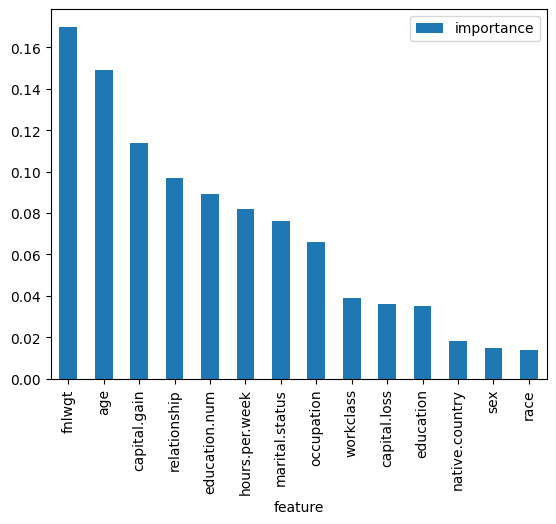

In [ ]:
importances.plot.bar()

In [ ]:
# df_train_new = df_train

# # df_train_new

In [ ]:
# df_train_new  = df_train_new.drop("workclass", axis=1)
# df_train_new   = df_train_new.drop("education", axis=1)
# df_train_new  = df_train_new.drop("capital.loss", axis=1)
# df_train_new  = df_train_new.drop("sex", axis=1)
# df_train_new   = df_train_new.drop("race", axis=1)
# df_train_new  = df_train_new.drop("native.country", axis=1)

In [ ]:
#  df_train_new

In [ ]:
# df_test_new = df_test

# df_test_new

In [ ]:
# df_test_new  = df_test_new.drop("workclass", axis=1)
# df_test_new   = df_test_new.drop("education", axis=1)
# df_test_new  = df_test_new.drop("capital.loss", axis=1)
# df_test_new  = df_test_new.drop("sex", axis=1)
# df_test_new   = df_test_new.drop("race", axis=1)
# df_test_new  = df_test_new.drop("native.country", axis=1)

In [ ]:
# df_test_new

In [ ]:
# X_train= df_train_new.drop(['income'], axis=1)
# Y_train = df_train_new['income']

# X_test= df_test_new.drop(['income'], axis=1)
# Y_test = df_test_new['income']

In [ ]:
# from sklearn import preprocessing

# categorical = [ 'marital.status', 'occupation', 'relationship']
# for feature in categorical:
#         le = preprocessing.LabelEncoder()
#         X_train[feature] = le.fit_transform(X_train[feature])
#         X_test[feature] = le.transform(X_test[feature])

In [ ]:
# X_test

In [ ]:
# #Using StandardScalar to normalise the dataset

# from sklearn.preprocessing import StandardScaler

# scaler = StandardScaler()

# X_train = pd.DataFrame(scaler.fit_transform(X_train), columns = X_train.columns)

# X_test = pd.DataFrame(scaler.transform(X_test), columns = X_train.columns)
# X_train.head()


In [ ]:
# from sklearn.ensemble import RandomForestClassifier

# random_forest = RandomForestClassifier(n_estimators=10)
# random_forest.fit(X_train, Y_train)

# Y_prediction = random_forest.predict(X_test)

# random_forest.score(X_train, Y_train)
# acc_random_forest = random_forest.score(X_train, Y_train) * 100
# print("training accuracy:", acc_random_forest)
# error_rate_rf = 100.0 - acc_random_forest
# print("training error:", error_rate_rf)

# test_accuracy = random_forest.score(X_test, Y_test)
# print("testing accuracy:", test_accuracy*100)

# print("testing error:", 100.0 - test_accuracy*100)

training accuracy: 98.67633057952766
training error: 1.323669420472342
testing accuracy: 84.93950003071065
testing error: 15.060499969289353


#KNNDownsampling

In [ ]:

from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd

error_rates = []

downsample_percentages = [50, 60, 70, 80, 90]
categorical = ['workclass', 'education', 'marital.status', 'occupation', 'relationship', 'race', 'sex', 'native.country']
le_dict = {feature: preprocessing.LabelEncoder() for feature in categorical}
scaler = StandardScaler()

for feature in categorical:
    df_train[feature] = le_dict[feature].fit_transform(df_train[feature])
    df_test[feature] = le_dict[feature].transform(df_test[feature])

X_train_scaled = pd.DataFrame(scaler.fit_transform(df_train.drop('income', axis=1)), columns=df_train.columns[:-1])
Y_train = df_train['income']
X_test_scaled = pd.DataFrame(scaler.transform(df_test.drop('income', axis=1)), columns=df_test.columns[:-1])
Y_test = df_test['income']


for x in downsample_percentages:
    downsampled_indices = df_train.groupby('income', group_keys=False).apply(lambda group: group.sample(frac=x/100)).index
    X_downsampled = X_train_scaled.loc[downsampled_indices]
    Y_downsampled = Y_train.loc[downsampled_indices]

    knn = KNeighborsClassifier(n_neighbors = 3)
    knn.fit(X_downsampled, Y_downsampled)
    Y_pred_test = knn.predict(X_test_scaled)

    # Calculate the error rate
    error_rate = 1 - accuracy_score(Y_test, Y_pred_test)
    error_rates.append(error_rate)

# Now that we have the error rates for each percentage, calculate the mean and standard deviation
mean_error_rate = np.mean(error_rates)
std_dev_error_rate = np.std(error_rates)

print(f"Error Rates for each percentage: {error_rates}")
print(f"Mean Error Rate: {mean_error_rate:.3f}")
print(f"Standard Deviation: {std_dev_error_rate:.3f}")


Error Rates for each percentage: [0.18131564400221112, 0.18137706529082975, 0.1768933112216694, 0.178981635034703, 0.17959584792088934]
Mean Error Rate: 0.180
Standard Deviation: 0.002


#Random forest downsampling

In [ ]:
from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd

error_rates = []

downsample_percentages = [50, 60, 70, 80, 90]

for x in downsample_percentages:
    # Downsample the training data
    downsampled_indices = df_train.groupby('income', group_keys=False).apply(lambda group: group.sample(frac=x/100)).index
    X_downsampled = X_train_scaled.loc[downsampled_indices]
    Y_downsampled = Y_train.loc[downsampled_indices]

    random_forest = RandomForestClassifier(n_estimators=10)
    random_forest.fit(X_downsampled, Y_downsampled)

    Y_pred_test = random_forest.predict(X_test_scaled)

    error_rate = 1 - accuracy_score(Y_test, Y_pred_test)
    error_rates.append(error_rate)

mean_error_rate = np.mean(error_rates)
std_dev_error_rate = np.std(error_rates)

print(f"Error Rates for each percentage: {error_rates}")
print(f"Mean Error Rate: {mean_error_rate:.3f}")
print(f"Standard Deviation: {std_dev_error_rate:.3f}")


Error Rates for each percentage: [0.1519562680425035, 0.1509121061359867, 0.15023647196118173, 0.15103494871322398, 0.1515877403107917]
Mean Error Rate: 0.151
Standard Deviation: 0.001


#Beating the Classic Classifiers

In [ ]:
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, f1_score

label_encoder = LabelEncoder()
Y_train_encoded = label_encoder.fit_transform(Y_train)
Y_test_encoded = label_encoder.transform(Y_test)

boosted_gd = XGBClassifier(learning_rate=0.35, n_estimators=500)
model = boosted_gd.fit(X_train, Y_train_encoded)

pred = model.predict(X_test)

# Since the predictions will be in the encoded form, you need to decode them back to the original labels if needed
# pred_3_labels = label_encoder.inverse_transform(pred_3)

# Evaluate the model

print("The accuracy of model 3: ", accuracy_score(Y_test_encoded, pred)*100)
print("Testing error of model:, " , 100 - accuracy_score(Y_test_encoded, pred)*100)



The accuracy of model 3:  86.0082304526749
Testing error of model:,  13.991769547325106


In [ ]:
#Applying the random forest algorithm
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(n_estimators=200)
random_forest.fit(X_train, Y_train)

Y_prediction = random_forest.predict(X_test)

random_forest.score(X_train, Y_train)
acc_random_forest = random_forest.score(X_train, Y_train) * 100
print("training accuracy:", acc_random_forest)
error_rate_rf = 100.0 - acc_random_forest
print("training error:", error_rate_rf)

test_accuracy = random_forest.score(X_test, Y_test)
print("testing accuracy:", test_accuracy*100)

print("testing error:", 100.0 - test_accuracy*100)

training accuracy: 99.99692884125182
training error: 0.0030711587481846436
testing accuracy: 85.66427123641054
testing error: 14.335728763589458
